C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\729324610.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\729324610.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\729324610.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\729324610.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


Mann-Whitney U test result: U-statistic=8717.5, p-value=0.004154566889611255


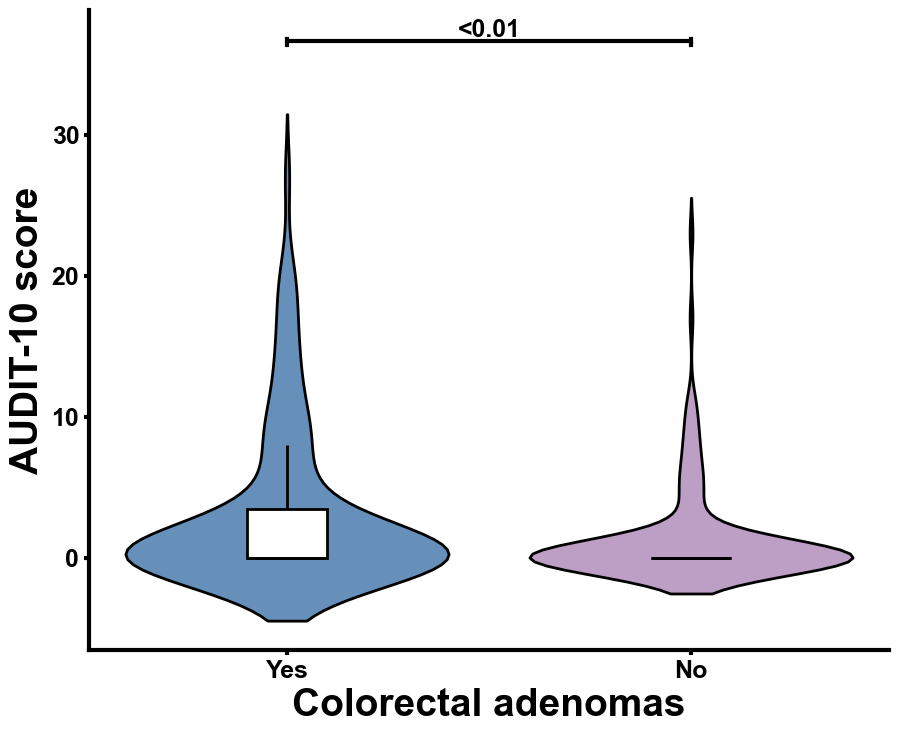

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="AUDIT-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="AUDIT-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("AUDIT-10 score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['AUDIT-score']
group2_data = df[df['colorectal adenomas'] == 'No']['AUDIT-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('AUDIT-10.pdf', dpi=1200)

Mann-Whitney U test result: U-statistic=8296.0, p-value=0.01786817413052736


C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\108079122.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\108079122.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\108079122.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\108079122.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


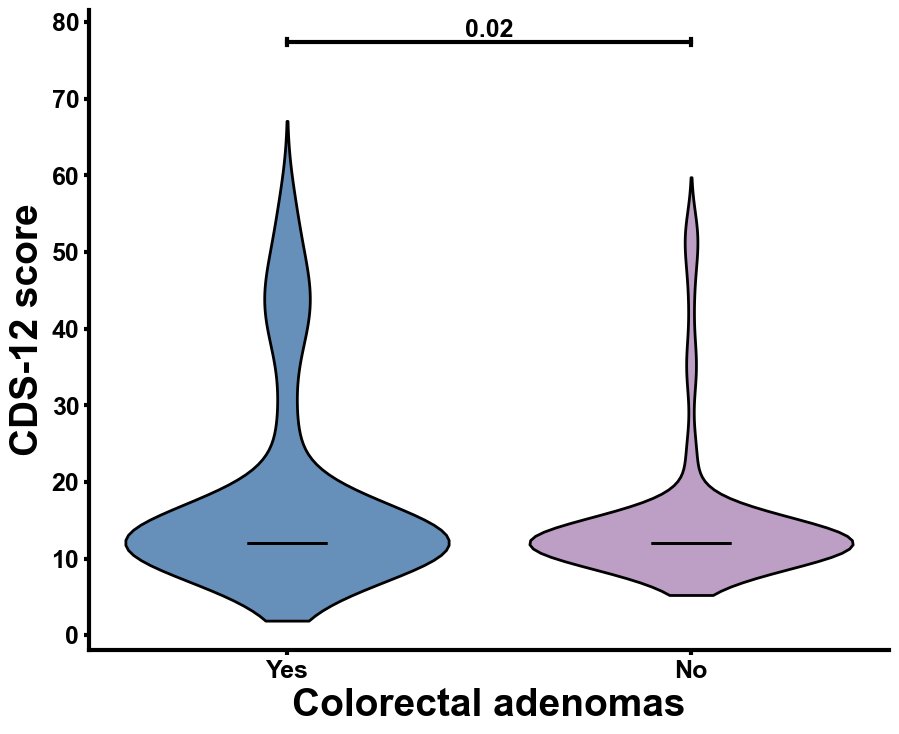

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="CDS-12-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="CDS-12-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("CDS-12 score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['CDS-12-score']
group2_data = df[df['colorectal adenomas'] == 'No']['CDS-12-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('CDS-12-score.pdf', dpi=1200)

Independent t-test result: t-statistic=2.326230039474446, p-value=0.020826210599767685


C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\3401632627.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\3401632627.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\3401632627.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\3401632627.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


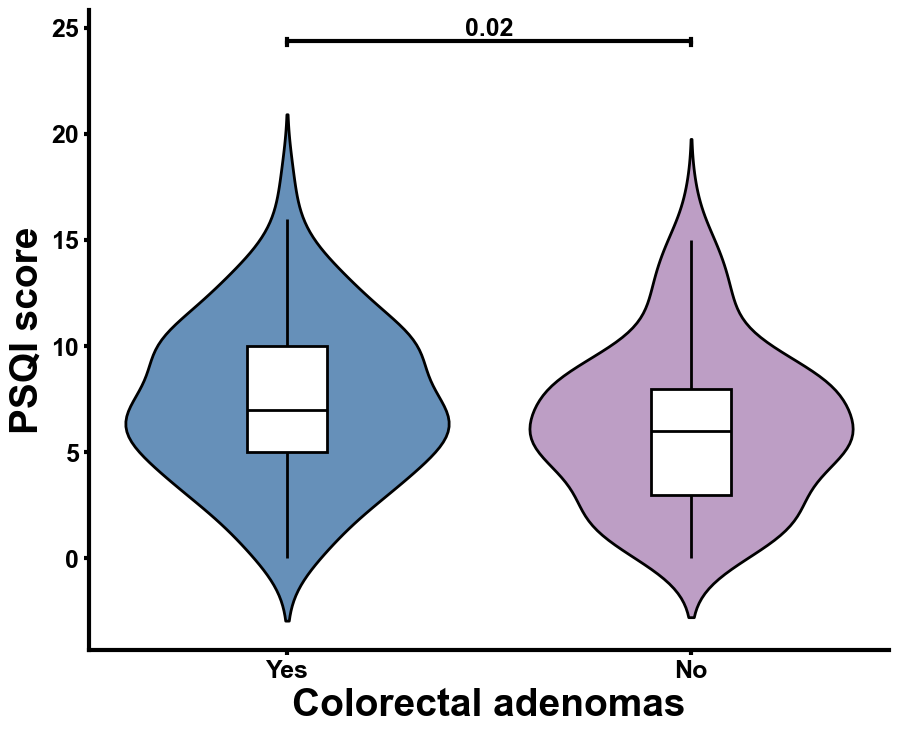

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="PSQI-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="PSQI-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("PSQI score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['PSQI-score']
group2_data = df[df['colorectal adenomas'] == 'No']['PSQI-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('PSQI-score.pdf', dpi=1200)

Mann-Whitney U test result: U-statistic=7649.0, p-value=0.7006997251548678


C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\4260540637.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\4260540637.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\4260540637.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\4260540637.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


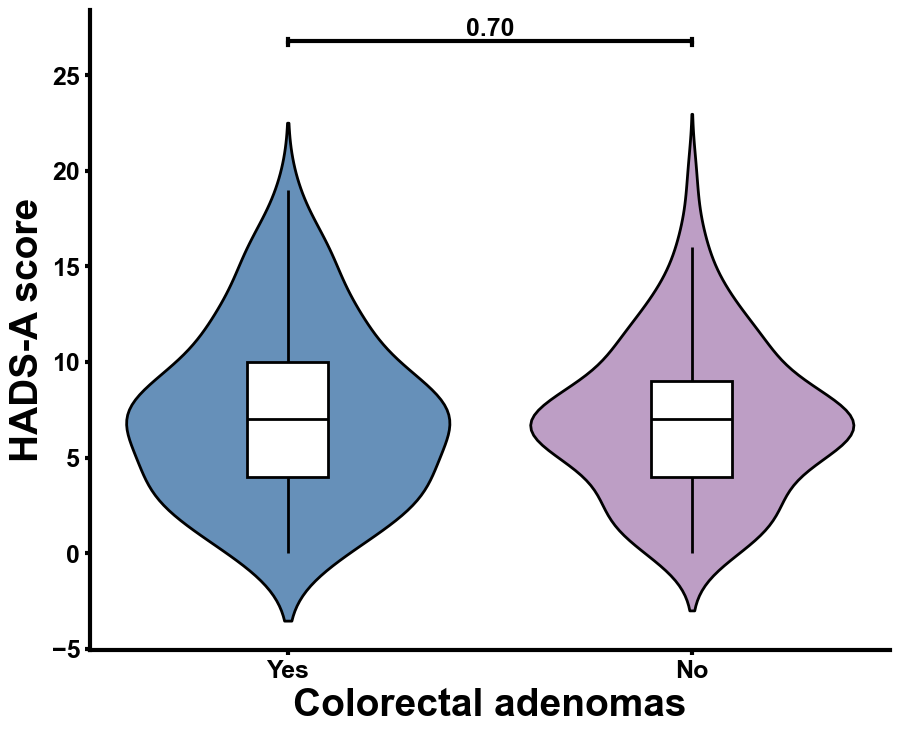

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="HADS-A-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="HADS-A-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("HADS-A score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['HADS-A-score']
group2_data = df[df['colorectal adenomas'] == 'No']['HADS-A-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('HADS-A-score.pdf', dpi=1200)

Mann-Whitney U test result: U-statistic=8947.0, p-value=0.006075290590252401


C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\2974412335.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\2974412335.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\2974412335.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\2974412335.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


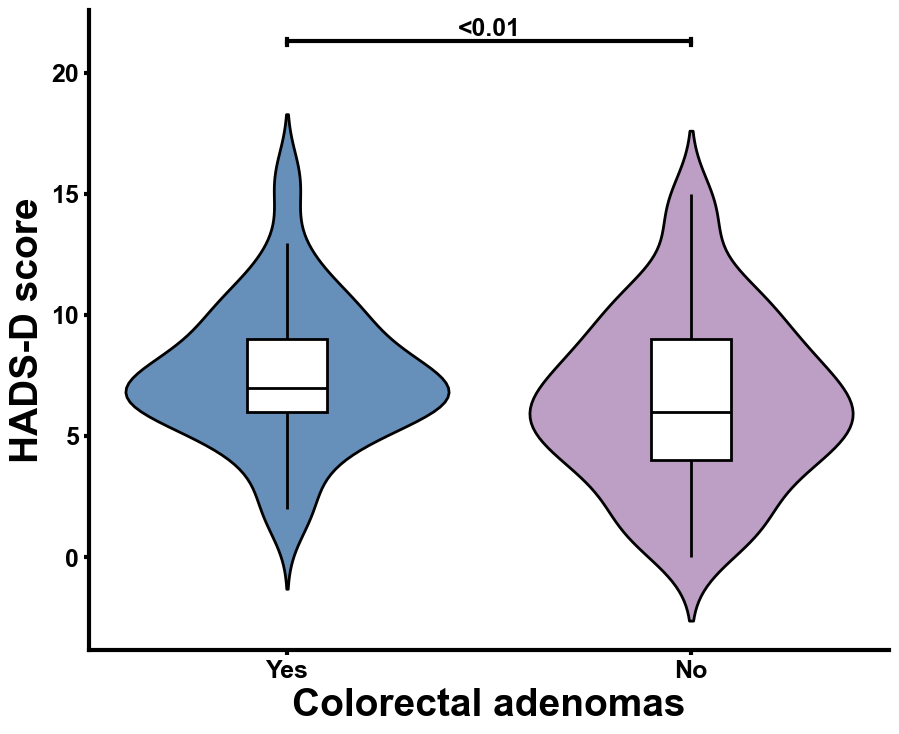

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="HADS-D-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="HADS-D-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("HADS-D score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['HADS-D-score']
group2_data = df[df['colorectal adenomas'] == 'No']['HADS-D-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('HADS-D-score.pdf', dpi=1200)

Independent t-test result: t-statistic=-1.441841918889376, p-value=0.15062922304456622


C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\780223209.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\780223209.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\780223209.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11460\780223209.py:45: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,


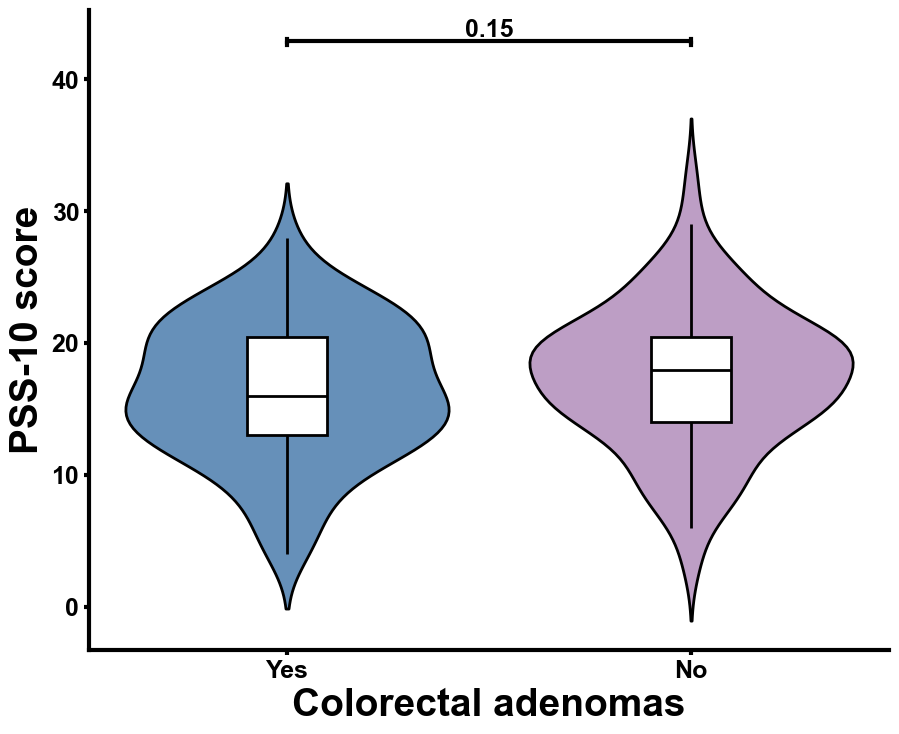

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load data
df = pd.read_excel(r"D:\OneDrive\2Yang_Liu\20231105cross-sectional study\original dataset.xlsx")
df.rename(columns={"有无息肉": "colorectal adenomas"}, inplace=True)  # Rename column correctly
df["colorectal adenomas"] = df["colorectal adenomas"].replace({1: "Yes", 0: "No"})  # Correct replacement

# Define colors
colors = ["#00468B99", "#925E9F99"]

# Set the figure size and font properties
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Thicker border for the plot and ticks
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(data=df, 
               x="colorectal adenomas", 
               y="PSS-10-score", 
               hue=None,
               palette=colors, 
               saturation=1,
               fill=True,
               inner=None,  # Remove the default inner box
               linewidth=2,
               linecolor="black",
               legend=False,
               dodge=False,  # Ensure the violins are not dodged
               ax=ax)

# Overlay the box plot with a narrower box
sns.boxplot(data=df, 
            x="colorectal adenomas", 
            y="PSS-10-score", 
            hue=None,
            palette=["#FFFFFF"],  # White color for the box
            fill=True,
            gap=0,
            linewidth=2,
            linecolor="black",
            width=0.2,  # Adjust the width of the box to make it narrower
            showfliers=False,  # Hide outliers
            showcaps=False,  # Hide the end lines (caps)
            legend=False,  # Ensure the box plot is on top
            zorder=10,  # Ensure the box plot is on top
            dodge=False,  # Ensure the box plot aligns with the violin plot
            ax=ax)

# Set the x-axis and y-axis labels with font size 28 and bold
ax.set_xlabel("Colorectal adenomas", fontsize=28, weight='bold')
ax.set_ylabel("PSS-10 score", fontsize=28, weight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separate data for the two groups
group1_data = df[df['colorectal adenomas'] == 'Yes']['PSS-10-score']
group2_data = df[df['colorectal adenomas'] == 'No']['PSS-10-score']

# Check if the data is normally distributed
k2_group1, p_group1 = stats.normaltest(group1_data)
k2_group2, p_group2 = stats.normaltest(group2_data)

alpha = 0.05  # Significance level

# Determine normality of the data
is_normal_group1 = p_group1 > alpha
is_normal_group2 = p_group2 > alpha

# Perform the appropriate statistical test based on normality
if is_normal_group1 and is_normal_group2:
    t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
    print(f"Independent t-test result: t-statistic={t_stat}, p-value={p_value}")
else:
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    print(f"Mann-Whitney U test result: U-statistic={u_stat}, p-value={p_value}")

# Add line and p-value text to the plot
y_max = ax.get_ylim()[1] * 1.1  # Adjust y-axis to add space for annotation
x1, x2 = 0, 1  # Indices for the groups
ax.plot([x1, x1, x2, x2], [y_max, y_max + 0.05, y_max + 0.05, y_max], lw=3, c="black")
line_height = 0.005 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Calculate line height for end lines
ax.plot([x1, x1], [y_max - line_height, y_max + line_height], lw=3, c="black")
ax.plot([x2, x2], [y_max - line_height, y_max + line_height], lw=3, c="black")

# Display p-value text
if p_value < 0.01:
    display_p_value = "<0.01"
else:
    display_p_value = f"{p_value:.2f}"

ax.text((x1 + x2) / 2, y_max + 0.05, display_p_value, ha='center', va='bottom', fontsize=18, weight='bold')

# Adjust the subplot parameters to reduce margins
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# Save the plot
plt.savefig('PSS-10-score.pdf', dpi=1200)

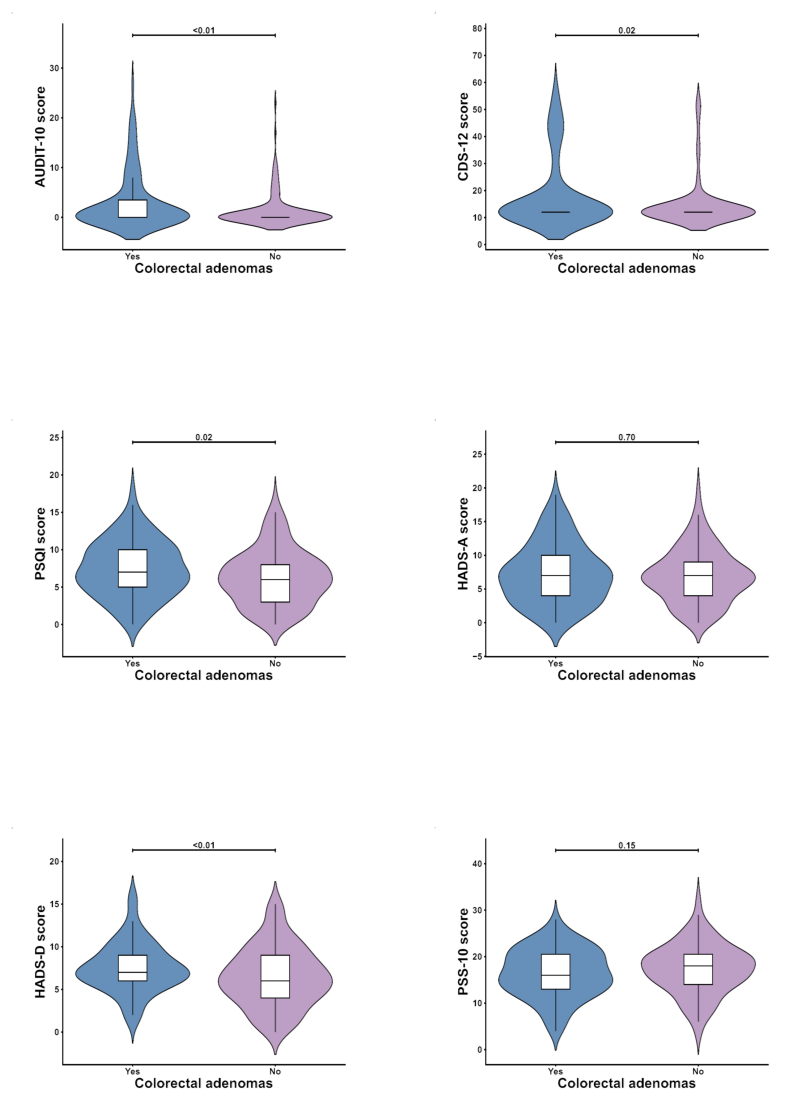

In [3]:
import os
from PyPDF2 import PdfReader, PdfWriter
from PIL import Image, ImageDraw, ImageFont
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: 获取当前文件夹下所有pdf文件
pdf_files = [
    "AUDIT-10.pdf",
    "CDS-12-score.pdf",
    "PSQI-score.pdf",
    "HADS-A-score.pdf",
    "HADS-D-score.pdf",
    "PSS-10-score.pdf"
]

# Step 2: 为每个PDF加上标记（a, b, c...）
for idx, pdf_file in enumerate(pdf_files):
    # 将PDF转换为图片
    images = convert_from_path(pdf_file) 
    
    # 为每个图片添加标记
    for i, image in enumerate(images):
        draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()  # 使用默认字体
        label = chr(97 + idx)  # 根据索引生成a, b, c, ...
        draw.text((10, 10), label,fontsize=24, font=font, fill="black")
        images[i] = image

    # 保存图片为临时文件
    temp_image_path = f"{pdf_file}_label.png"
    images[0].save(temp_image_path)

# Step 3: 将所有pdf重新排列组合成3行2列
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.ravel()  # 展开成1D数组

for i, pdf_file in enumerate(pdf_files):
    img = mpimg.imread(f"{pdf_file}_label.png")  # 加载添加标签的图片
    axes[i].imshow(img)
    axes[i].axis('off')  # 关闭坐标轴

# 保存输出的图形
#plt.savefig("output_combined.pdf", dpi=300, bbox_inches='tight')